<a href="https://colab.research.google.com/github/NRJaggers/Applied-Stochastic-Processes/blob/main/Applications/2-Markov_Chains/Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Markov Chains


---

## Prompt

Original Prompt can be found [here](https://bookdown.org/kevin_davisross/applied-stochastic-processes/app-mc.html). A copy of the prompt along with the completed exercise can be found under [/Applications](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/Applications).

## Summary

Every day for lunch you have either a \\$9 sandwich (state 1), a \\$7 burrito (state 2), or a \\$5 pizza (state 3). Suppose your lunch choices from one day to the next follow a Markov chain with transition matrix. You start out with eating pizza on Monday (Day 0).

$$
\mathbf{P} =
\begin{bmatrix}
0 & 0.5 & 0.5\\
0.1 & 0.4 & 0.5\\
0.2 & 0.3 & 0.5
\end{bmatrix}
$$

$T$ = the first day you have a sandwich.

$V$ = the number of days you have a burrito this five-day work week.

$X_n$ = the cost of your lunch on day $n$.

$W = X_0 + \cdots + X_4$ = the total lunch cost for this five-day work week.

---

## Application

In [1]:
pip install symbulate

In [2]:
from symbulate import *
%matplotlib inline

###1.

Approximate the marginal distribution, along with the expected value and standard deviation, of each of the following:
$$X_4 \qquad T \qquad V \qquad W$$

In [3]:
#Set up markov chain
states = [9, 7, 5]

TransitionMatrix = [[0, 0.5, 0.5],
                   [0.1, 0.4, 0.5],
                   [0.2, 0.3, 0.5]]

InitialDistribution = [0, 0, 1] # pizza on the Monday

X = MarkovChain(TransitionMatrix, InitialDistribution, states)

#define any other simulation parameters
n_sims = 10000
days_in_week = 5 # Friday is day 4

$X_4$

In [4]:
#run simulation and generate results
results = X.sim(10000)
results[4].tabulate()

5,4908
7,3650
9,1442
Total,10000


In [5]:
results[4].tabulate(normalize=True)

5,0.4908
7,0.365
9,0.1442
Total,1.0


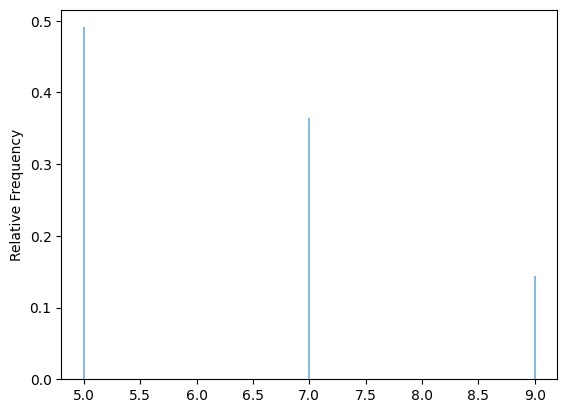

In [6]:
results[4].plot()

From the plot we can see the distribution of the cost of lunch on Friday. Half the time we are spending \$5 on pizza , while closly behind that we are spending \$7 on burritos. It is every so often that we splurge on a \$9 sandwitch.

In [7]:
#calculate and present expected value
ev = results[4].mean()

print("The expected value is ${:.2f}".format(ev))

The expected value is $6.31


In [8]:
#calculate and present standard deviation
std_dev = results[4].std()

print("The standard deviation is ${:.2f}".format(std_dev))

The standard deviation is $1.44


$T$

In [9]:
def first_sando(x):
  day = 1;
  while(x[day] != 9):
    day += 1
  return day

T = results.apply(first_sando)
T.tabulate()

1,1976
2,1312
3,1102
4,943
5,756
6,620
7,539
8,418
9,395
10,284
11,243


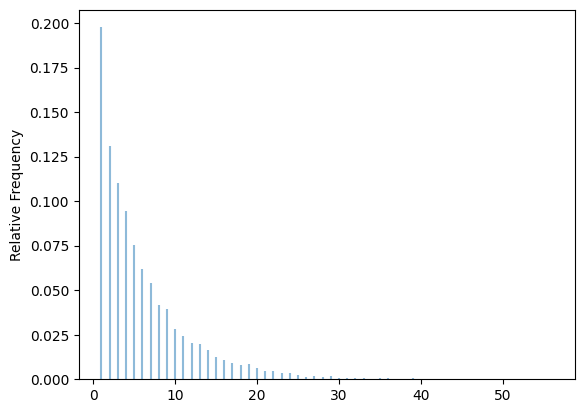

In [10]:
T.plot()

From this plot we can see that the distribution of first sandwitch day is skewed. We are very likey to have a sandwitch within the first few days, but it is possible to go a few weeks without having the first one.

In [11]:
#calculate and present expected value
ev = T.mean()

print("The expected value is {:.2f} days".format(ev))

The expected value is 6.00 days


In [12]:
#calculate and present standard deviation
std_dev = T.std()

print("The standard deviation is {:.2f} days".format(std_dev))

The standard deviation is 5.75 days


$V$

In [13]:
def burrito_count(x):
  count = 0
  for day in range(1,days_in_week):
    if x[day] == 7:
      count +=1

  return count

V = results.apply(burrito_count)
V.tabulate()

0,1886
1,3770
2,3045
3,1123
4,176
Total,10000


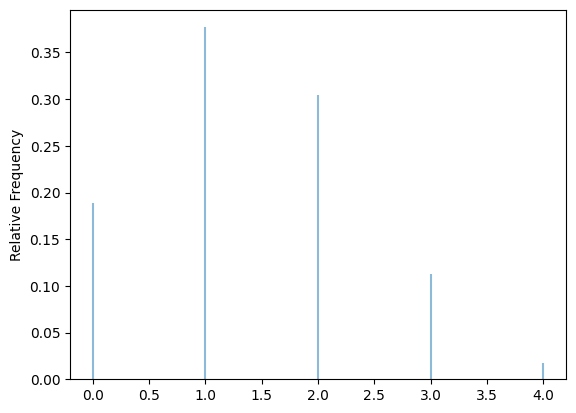

In [14]:
V.plot()

This plot of our burrito count distribution is showing how it is likely we will have at least 1 or 2 burritos in this week but less likely we will have all burritos after one day of pizza or no burritos at all.

In [15]:
#calculate and present expected value
ev = V.mean()

print("The expected value is {:.2f} burritos".format(ev))

The expected value is 1.39 burritos


In [16]:
#calculate and present standard deviation
std_dev = V.std()

print("The standard deviation is {:.2f} burritos".format(std_dev))

The standard deviation is 0.97 burritos


$W$

In [17]:
W = (X[0] + X[1] + X[2] + X[3] + X[4]).sim(10000)
W.tabulate()

25,624
27,1509
29,2588
31,2718
33,1750
35,702
37,109
Total,10000


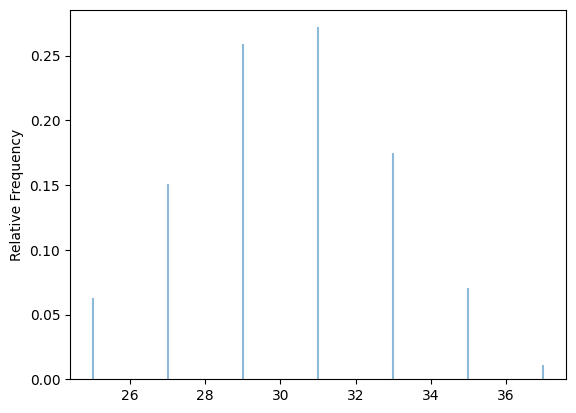

In [18]:
W.plot()

This distribution shows how the cost of lunches this week is likely to hover around \$29-\$39.

In [19]:
#calculate and present expected value
ev = W.mean()

print("The expected value is ${:.2f} for lunch this week".format(ev))

The expected value is $30.20 for lunch this week


In [20]:
#calculate and present standard deviation
std_dev = W.std()

print("The standard deviation is ${:.2f} for lunch this week".format(std_dev))

The standard deviation is $2.70 for lunch this week


###2.

Approximate the joint distribution, along with the correlation, of each of the following:
$$X_4 \text{ and } X_5$$
$$T \text{ and } V$$
$$T \text{ and } W$$
$$W \text{ and } V$$


$X_4$ and $X_5$

In [21]:
result = (X[4] & X[5]).sim(10000)
result.tabulate(normalize = True)

"(5, 5)",0.2533
"(5, 7)",0.1529
"(5, 9)",0.0993
"(7, 5)",0.1796
"(7, 7)",0.1438
"(7, 9)",0.0339
"(9, 5)",0.0661
"(9, 7)",0.0711
Total,1.0000000000000002


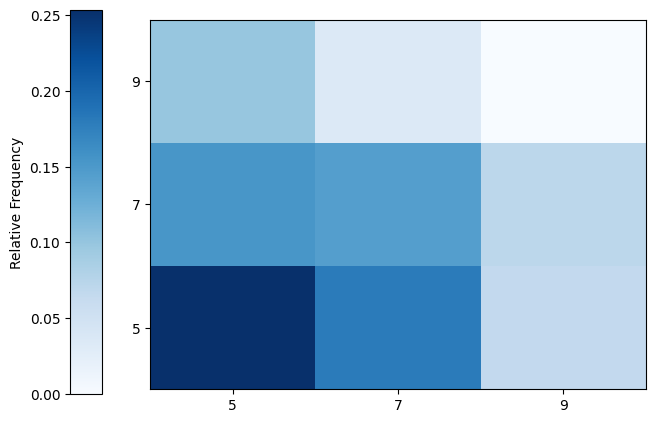

In [22]:
result.plot(type="tile")

This tile plot shows us how the cost of lunch varies from Friday to next Monday jointly.

In [23]:
correlation = result.corr()

print("The correlation between the price of lunch of the two days is {:.4f}".format(correlation))

The correlation between the price of lunch of the two days is -0.0931


$T$ and $V$

In [24]:
T_V = (X.apply(first_sando) & X.apply(burrito_count)).sim(10000)
T_V.tabulate()

"(1, 0)",460
"(1, 1)",836
"(1, 2)",568
"(1, 3)",167
"(2, 0)",353
"(2, 1)",521
"(2, 2)",334
"(2, 3)",62
"(3, 0)",252
"(3, 1)",493
"(3, 2)",269


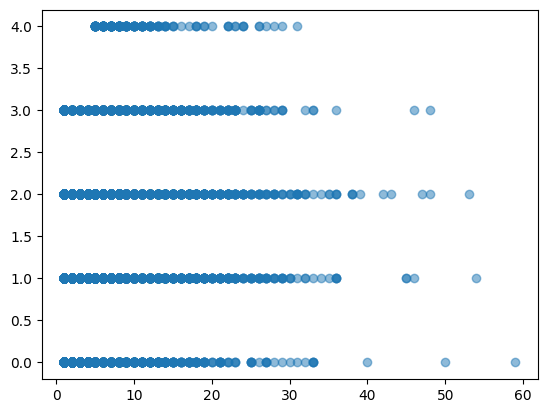

In [25]:
T_V.plot()

Here we can see how the joint distribution of first sandwitch day and burrito count behave. They do not seem to be stronly related.

In [26]:
correlation = T_V.corr()

print("The correlation between the first day of sandwitch and burrito count is {:.4f}".format(correlation))

The correlation between the first day of sandwitch and burrito count is 0.1969


$T$ and $W$

In [27]:
T_W = (X.apply(first_sando) & (X[0] + X[1] + X[2] + X[3] + X[4])).sim(10000)
T_W.tabulate()

"(1, 29)",245
"(1, 31)",546
"(1, 33)",658
"(1, 35)",455
"(1, 37)",69
"(2, 29)",251
"(2, 31)",471
"(2, 33)",420
"(2, 35)",148
"(2, 37)",19
"(3, 29)",271


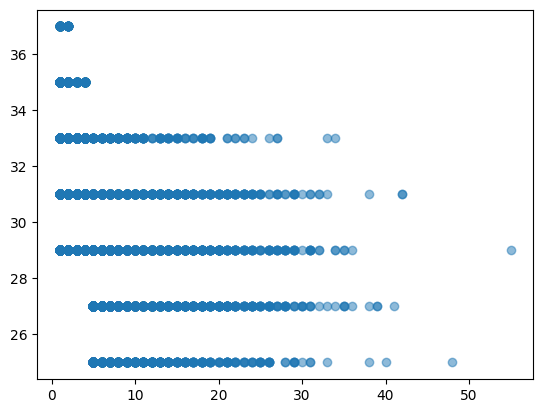

In [28]:
T_W.plot()

Above we see how first sandwitch and lunch cost are distributed. We can clearly see there is a relationship between the two. since sandwitches are more expensive, it is likey that when we have them the cost of that weeks lunch will also be significatly more.

In [29]:
correlation = T_W.corr()

print("The correlation between the first day of sandwitch and weekly lunch cost is {:.4f}".format(correlation))

The correlation between the first day of sandwitch and weekly lunch cost is -0.4754


$W$ and $V$

In [30]:
V_W = (X.apply(burrito_count) & (X[0] + X[1] + X[2] + X[3] + X[4])).sim(10000)
V_W.tabulate()

"(0, 25)",617
"(0, 29)",975
"(0, 33)",317
"(1, 27)",1511
"(1, 31)",1872
"(1, 35)",364
"(2, 29)",1549
"(2, 33)",1286
"(2, 37)",111
"(3, 31)",838
"(3, 35)",360


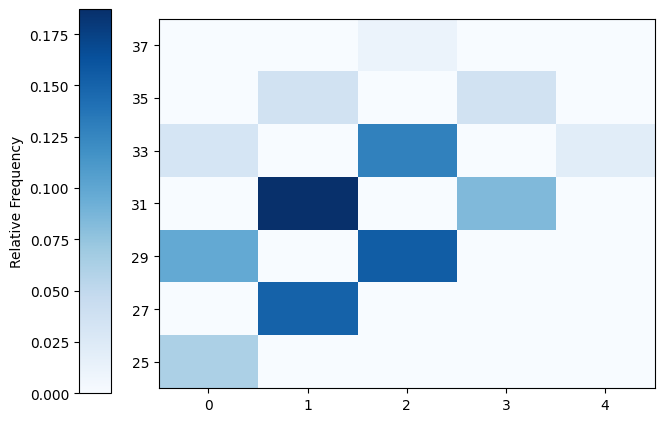

In [31]:
V_W.plot(type="tile")

The tile plot above shows how burrito count and weekly cost vary jointly. We can see that as the burritos we comsume increases, the cost for the week also increases.

In [32]:
correlation = V_W.corr()

print("The correlation between burrito count and weekly lunch cost is {:.4f}".format(correlation))

The correlation between burrito count and weekly lunch cost is 0.4584


###3.

Approximate the conditional distribution of $V$ given $T=4$, along with its (conditional) mean and standard deviation.

$V$

In [33]:
T_4 = ((X[0] != 9) & (X[1] != 9) & (X[2] != 9) & (X[3] != 9) & (X[4] == 9))
V_T4 = (X.apply(burrito_count) | T_4).sim(10000)
V_T4.tabulate()

0,2755
1,4144
2,2517
3,584
Total,10000


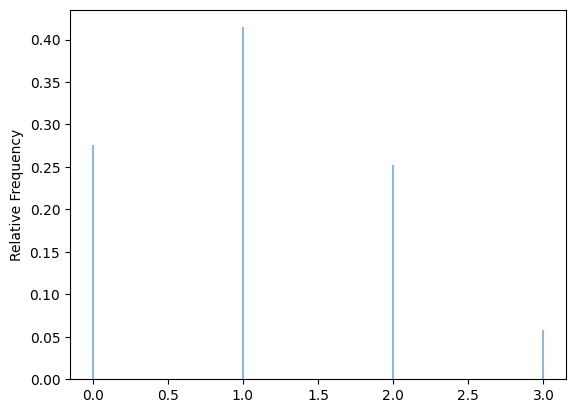

In [34]:
V_T4.plot()

This distribution shows the likely amount of burritos to be consumed during the week given we know we will eat a sandwitch on Friday.

$\mu$

In [35]:
#calculate and present expected value
ev = V_T4.mean()

print("The expected value is {:.2f} burritos given Friday is sandwitch day.".format(ev))

The expected value is 1.09 burritos given Friday is sandwitch day.


$\sigma$

In [36]:
#calculate and present standard deviation
std_dev = V_T4.std()

print("The standard deviation is {:.2f} burritos given Friday is sandwitch day.".format(std_dev))

The standard deviation is 0.87 burritos given Friday is sandwitch day.


###4.

Your choice. Choose at least one other joint, conditional, or marginal distribution to investigate. You can work with $X_n, T, V, W$, but you are also welcome to define other random variables in this context. You can also look at time frames other than a single week.

In [37]:
W_V2 = ((X[0] + X[1] + X[2] + X[3] + X[4]) | (X.apply(burrito_count) == 2)).sim(10000)
W_V2.tabulate()

29,5380
33,4275
37,345
Total,10000


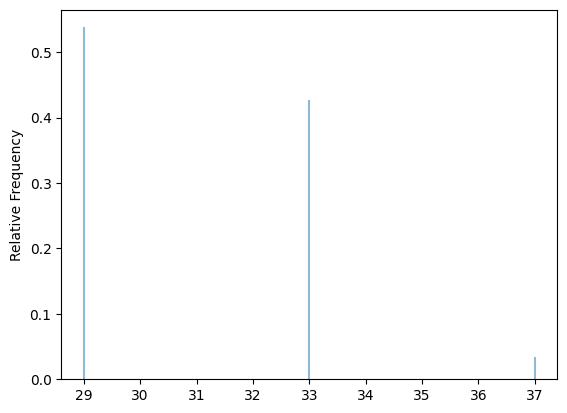

In [38]:
W_V2.plot()

I didn't think this through. I wasn't expecting the distribution to have so few possible outputs, however this makes sense. Since we are locking in two burrios for the week, we have narrowed down our price range. And we only have two other days to work with in picking lunches that would affect the amount of money spent during the week. It is acting very periodic.

In [39]:
#calculate and present expected value
ev = W_V2.mean()

print("The expected value is ${:.2f} given 2 burritos this week.".format(ev))

The expected value is $30.99 given 2 burritos this week.


In [40]:
#calculate and present standard deviation
std_dev = W_V2.std()

print("The standard deviation is ${:.2f} given 2 burritos this week.".format(std_dev))

The standard deviation is $2.26 given 2 burritos this week.
